In [16]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [80]:
m = build.Model(data=redf_store.redata, kind='xirace', dynamic='hyp')
m.make_optimizer(tol=1.e-20, ntrials=10000, maxfev=5000, multiopt=True)

In [82]:
m.optimize()

In [52]:
opt=m.opt
opt.make_simulator()
sim = opt.simulator
simfx = sim.sim_fx

# FINDING BASIN

In [22]:
#m.opt.make_simulator()
p = m.opt.find_basin(m.inits)

In [32]:
p1=m.inits
p2 = opt.__nudge_params__(p1)

if opt.multiopt:
      p2x = dict(deepcopy(p2))
      pxbasin = opt.find_basin(p=p2x, nsuccess=5)
      p2 = opt.test_basin(p2, pxbasin)


In [53]:
p1=m.inits
po = opt.__nudge_params__(p1)

In [73]:
x = m.data.query('ttype=="stop"').groupby(['Cond', 'ssd']).std()['response'].values


In [79]:
np.median(x.reshape(2,5), axis=1)[:,None]/x.reshape(2,5)

array([[ 5.14379,  2.58262,  1.     ,  0.5889 ,  0.96532],
       [ 8.66115,  2.62228,  1.     ,  0.50713,  0.6446 ]])

In [67]:
pwts = np.median(m.observed.groupby()[1:7])/m.observed.sem()[1:7]

In [68]:
pwts

Go     1.0579
200    9.4167
250    3.6151
300    0.9481
350    0.4077
400    0.6474
dtype: float64

In [41]:
cb = np.sum(sim.__cost_fx__(pxbasin)**2)
ct = np.sum(sim.__cost_fx__(po)**2)

{'a': array([ 0.24266,  0.24266]),
 'ssv': 1.1244,
 'tr': array([ 0.335,  0.335]),
 'v': array([ 0.96661,  1.01616]),
 'xb': array([ 1.5,  1.5])}

In [42]:
ct

0.081310167051834331

In [43]:
cb

0.067776207073722505

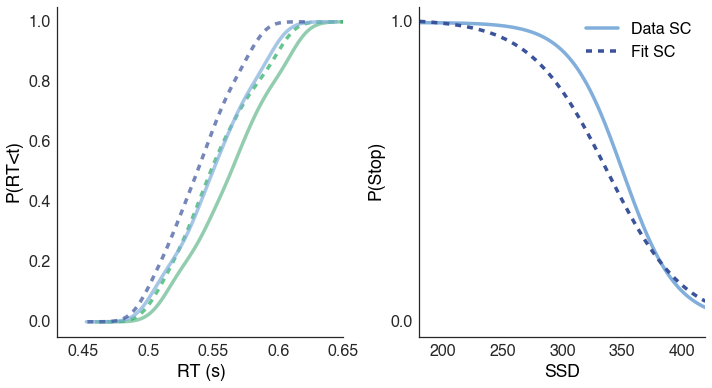

In [59]:
vis.plot_fits(m.avg_y[0], y2.reshape(2,16)[0], kind='radd')

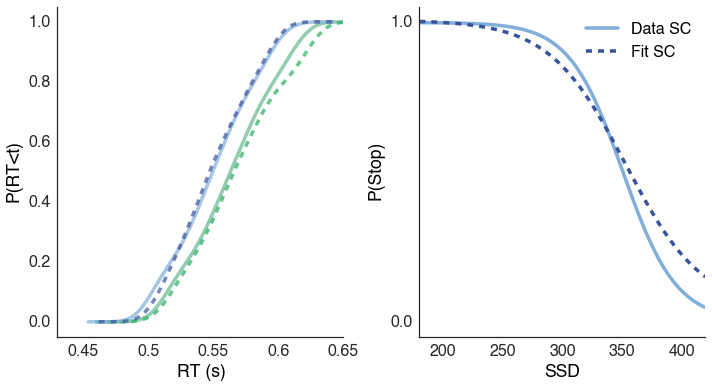

In [58]:
vis.plot_fits(m.avg_y[0], y1.reshape(2,16)[0], kind='radd')

In [56]:
y1 = simfx(pxbasin)
y2 = simfx(po)

In [34]:
pxbasin

{'a': 0.24266,
 'ssv': 1.1244,
 'tr': 0.335,
 'v': array([ 0.96661,  1.01616]),
 'xb': 1.5}

In [33]:
p2


{'a': 0.24266,
 'ssv': 1.1244,
 'tr': 0.335,
 'v': array([ 0.96661,  1.01616]),
 'xb': 1.5}

In [24]:
m.opt.simulator.ncond=2
m.opt.simulator.sim_fx(p)

array([ 0.6068,  0.999 ,  0.996 ,  0.9618,  0.864 ,  0.6648,  0.553 ,
        0.586 ,  0.607 ,  0.626 ,  0.646 ,  0.536 ,  0.559 ,  0.58  ,
        0.6   ,  0.626 ,  0.5632,  0.9994,  0.997 ,  0.9688,  0.8804,
        0.6902,  0.559 ,  0.588 ,  0.609 ,  0.628 ,  0.646 ,  0.538 ,
        0.565 ,  0.582 ,  0.601 ,  0.628 ])

In [ ]:
p=m.popt
f=m.fitinfo

In [ ]:
ii=0
ys=[]
fs=[]
while not f['CNVRG'] and ii<=25:
      y,f,p = mx.opt.gradient_descent(y=mx.avg_y, wts=mx.avg_wts, is_flat=False, inits=p)
      ys.append(y)
      fs.append(f)
      ii+=1